In [205]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

import tensorflow as tf

from sklearn.gaussian_process.kernels import (RBF, Matern, RationalQuadratic,ExpSineSquared, DotProduct,ConstantKernel)
from sklearn.gaussian_process import GaussianProcessRegressor  
from sklearn.svm import SVR

In [206]:
# def configure_plotly_browser_state():
#     import IPython
#     display(IPython.core.display.HTML('''
#     <script src="/static/components/requirejs/require.js"></script>
#       requirejs.config({
#         paths: {
#           base: '/static/base',
#           plotly: '/https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
#         },
#       });
#     </script>
#     '''))

In [207]:
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
#pyo.init_notebook_mode()


#configure_plotly_browser_state()

pyo.init_notebook_mode(connected=True)

In [208]:
dea_types = ["IO_VRS", "OO_CRS", "OO_VRS", "IO_CRS"]
dea_list = ["US22", "S22","US55","S55"]

for t in dea_list:
    
    exec(f"{t} = pd.read_excel('Data/{t}.xlsx', index_col=0)")
    
    for i, d in enumerate(dea_types):
        
        exec(f"{t}_{d} = pd.read_excel('Data/{t}_Solution.xlsx', index_col=0, header=[1], nrows=1000, skiprows = i * 1000 + i * 2)")
        

In [209]:
dfs_data = [US22, S22, US55, S55]

dfs_es = [US22_IO_VRS, US22_OO_CRS, US22_OO_VRS, US22_IO_CRS,
      S22_IO_VRS, S22_OO_CRS, S22_OO_VRS, S22_IO_CRS,
      US55_IO_VRS, US55_OO_CRS, US55_OO_VRS, US55_IO_CRS,
      S55_IO_VRS, S55_OO_CRS, S55_OO_VRS, S55_IO_CRS]

### US22_IO_VRS 

In [210]:
X = dfs_data[0]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,151.42,324.96,303.04,321.64
DMU 2,234.02,516.63,235.08,248.36
DMU 3,184.48,510.16,183.22,338.86
DMU 4,208.45,476.52,251.44,299.36
DMU 5,357.47,375.87,327.81,282.08


In [211]:
y = dfs_es[0]
y.head()

,Efficiency
DMU,
DMU 1,0.970309
DMU 2,0.594647
DMU 3,0.680770
DMU 4,0.657605
DMU 5,0.533526


In [212]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002184376088244929
neg_root_mean_squared_error: -0.04655673241541188
r2: 0.8239035428870964


In [213]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.001524398332610661
neg_root_mean_squared_error: -0.03801230622542087
r2: 0.874757281617908


In [214]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.001227791754644722
neg_root_mean_squared_error: -0.03474405006082483
r2: 0.9009677565586367


In [215]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0007740661361274666
neg_root_mean_squared_error: -0.02715918046586018
r2: 0.9368970122521739


In [216]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0004424391072447029
neg_root_mean_squared_error: -0.020894689309786125
r2: 0.9643215740675014


In [217]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0020419088053296114
neg_root_mean_squared_error: -0.04494517338937362
r2: 0.8356445647785469


In [218]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.005015068218399024
neg_root_mean_squared_error: -0.07075858991254506
r2: 0.5935202489578921


In [219]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.000490490741124167
neg_root_mean_squared_error: -0.02207102397618064
r2: 0.9603486536955327


In [220]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0001745313223957783
neg_root_mean_squared_error: -0.013096150727647759
r2: 0.9859085110429298


In [221]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Predictions"] = pd.Series(prediction.ravel())
res["Actuals"] = y_test.values
res["Diff"] = res.Predictions - res.Actuals
res

,Predictions,Actuals,Diff
0,0.717139,0.738444,-0.021305
1,0.741255,0.733762,0.007493
2,0.725978,0.722304,0.003674
3,0.532412,0.532461,-0.000049
4,0.513408,0.516163,-0.002755
...,...,...,...
195,0.713032,0.719291,-0.006259
196,0.658181,0.655715,0.002466
197,0.587740,0.585884,0.001856
198,0.783630,0.805055,-0.021426


In [222]:
print(res.describe())

       Predictions     Actuals        Diff
count   200.000000  200.000000  200.000000
mean      0.677802    0.680477   -0.002675
std       0.113849    0.120284    0.016100
min       0.467952    0.455656   -0.139690
25%       0.585180    0.586770   -0.007160
50%       0.661920    0.660770   -0.001561
75%       0.733400    0.738383    0.004383
max       0.996447    1.000000    0.032153


In [223]:
fig = px.scatter(res, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

In [224]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.4835
Epoch 2/1000
25/25 [==============================] - 0s 933us/step - loss: 0.0124
Epoch 3/1000
25/25 [==============================] - 0s 935us/step - loss: 0.0121
Epoch 4/1000
25/25 [==============================] - 0s 907us/step - loss: 0.0077
Epoch 5/1000
25/25 [==============================] - 0s 930us/step - loss: 0.0070
Epoch 6/1000
25/25 [==============================] - 0s 964us/step - loss: 0.0063
Epoch 7/1000
25/25 [==============================] - 0s 952us/step - loss: 0.0056
Epoch 8/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 9/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 10/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 11/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0040
Epoch 12/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 13/1000

In [225]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.00046586008249886095
neg_mean_squared_error: 0.02158379212508453
r2: 0.9676392242938932


In [226]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Predictions"] = pd.Series(prediction.ravel())
res_ann["Actuals"] = y_test.values
res_ann["Diff"] = res_ann.Predictions - res_ann.Actuals
res_ann

,Predictions,Actuals,Diff
0,0.730481,0.738444,-0.007964
1,0.734678,0.733762,0.000916
2,0.717237,0.722304,-0.005067
3,0.534623,0.532461,0.002162
4,0.517040,0.516163,0.000876
...,...,...,...
195,0.714027,0.719291,-0.005264
196,0.649090,0.655715,-0.006624
197,0.585547,0.585884,-0.000337
198,0.802350,0.805055,-0.002705


In [227]:
res_ann.describe()

,Predictions,Actuals,Diff
count,200.000000,200.000000,200.000000
mean,0.674029,0.680477,-0.006448
std,0.113019,0.120284,0.020650
min,0.451751,0.455656,-0.199462
25%,0.586156,0.586770,-0.006508
50%,0.657886,0.660770,-0.002956
75%,0.733308,0.738383,-0.000066
max,0.966534,1.000000,0.033897


In [228]:
fig = px.scatter(res_ann, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

### S22_IO_VRS 

In [229]:
X = dfs_data[1]
X.head()

,Input 1,Input 2,Output 1,Output 2
DMU 1,115.29,412.41,117.93,810.51
DMU 2,115.93,369.50,104.26,340.73
DMU 3,111.43,418.37,110.93,300.85
DMU 4,123.87,355.78,119.90,234.46
DMU 5,106.30,525.76,100.49,256.06


In [230]:
y = dfs_es[4]
y.head()

,Efficiency
DMU,
DMU 1,0.930841
DMU 2,0.803130
DMU 3,0.833498
DMU 4,0.790839
DMU 5,0.834618


In [231]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00038653563745596537
neg_root_mean_squared_error: -0.019205375810565396
r2: 0.8985060137384316


In [232]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00046472776697941803
neg_root_mean_squared_error: -0.021933517122068105
r2: 0.8721365940988022


In [233]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0003785126066327156
neg_root_mean_squared_error: -0.019246221242664334
r2: 0.9022456384303243


In [234]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0003073244132593013
neg_root_mean_squared_error: -0.01664116467281429
r2: 0.9209083284703732


In [235]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.00017908682693267087
neg_root_mean_squared_error: -0.013016475137327649
r2: 0.9537435991471627


In [236]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0004995968373023867
neg_root_mean_squared_error: -0.02212073049282704
r2: 0.8705061799858861


In [237]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.003105607081611915
neg_root_mean_squared_error: -0.05569438672536281
r2: 0.20125772011317325


In [238]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.00017703531606104322
neg_root_mean_squared_error: -0.012857897909444745
r2: 0.954248968562411


In [239]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.00010829458804975816
neg_root_mean_squared_error: -0.0100854946931403
r2: 0.9720309755050796


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Predictions"] = pd.Series(prediction.ravel())
res["Actuals"] = y_test.values
res["Diff"] = res.Predictions - res.Actuals
res

,Predictions,Actuals,Diff
0,0.741847,0.745251,-0.003405
1,0.806888,0.807192,-0.000303
2,0.771424,0.766747,0.004677
3,0.791018,0.795058,-0.004039
4,0.815386,0.812411,0.002975
...,...,...,...
195,0.753401,0.758284,-0.004882
196,0.847583,0.850687,-0.003104
197,0.882020,0.882541,-0.000521
198,0.775963,0.781551,-0.005588


In [241]:
print(res.describe())

       Predictions     Actuals        Diff
count   200.000000  200.000000  200.000000
mean      0.819856    0.818345    0.001510
std       0.066830    0.063469    0.009980
min       0.684155    0.684559   -0.032402
25%       0.772105    0.772292   -0.003356
50%       0.811641    0.813249    0.000052
75%       0.854219    0.852951    0.003795
max       1.055101    1.000000    0.055101


In [242]:
fig = px.scatter(res, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

In [243]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 1ms/step - loss: 1.1146
Epoch 2/1000
25/25 [==============================] - 0s 951us/step - loss: 0.0202
Epoch 3/1000
25/25 [==============================] - 0s 933us/step - loss: 0.0102
Epoch 4/1000
25/25 [==============================] - 0s 928us/step - loss: 0.0086
Epoch 5/1000
25/25 [==============================] - 0s 953us/step - loss: 0.0095
Epoch 6/1000
25/25 [==============================] - 0s 975us/step - loss: 0.0095
Epoch 7/1000
25/25 [==============================] - 0s 963us/step - loss: 0.0074
Epoch 8/1000
25/25 [==============================] - 0s 954us/step - loss: 0.0081
Epoch 9/1000
25/25 [==============================] - 0s 959us/step - loss: 0.0072
Epoch 10/1000
25/25 [==============================] - 0s 956us/step - loss: 0.0065
Epoch 11/1000
25/25 [==============================] - 0s 960us/step - loss: 0.0071
Epoch 12/1000
25/25 [==============================] - 0s 945us/step - loss: 0.0063
Epo

In [244]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.00019869699382417234
neg_mean_squared_error: 0.014095992119186657
r2: 0.9504266973360911


In [245]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Predictions"] = pd.Series(prediction.ravel())
res_ann["Actuals"] = y_test.values
res_ann["Diff"] = res_ann.Predictions - res_ann.Actuals
res_ann

,Predictions,Actuals,Diff
0,0.744197,0.745251,-0.001054
1,0.796159,0.807192,-0.011032
2,0.772687,0.766747,0.005940
3,0.807060,0.795058,0.012002
4,0.812958,0.812411,0.000547
...,...,...,...
195,0.762087,0.758284,0.003803
196,0.842198,0.850687,-0.008489
197,0.872905,0.882541,-0.009636
198,0.777659,0.781551,-0.003892


In [246]:
res_ann.describe()

,Predictions,Actuals,Diff
count,200.000000,200.000000,200.000000
mean,0.811816,0.818345,-0.006529
std,0.059476,0.063469,0.012524
min,0.680616,0.684559,-0.088876
25%,0.772274,0.772292,-0.011179
50%,0.805708,0.813249,-0.004431
75%,0.843751,0.852951,-0.000335
max,1.006948,1.000000,0.032140


In [247]:
fig = px.scatter(res_ann, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

### US55_IO_VRS 

In [248]:
X = dfs_data[2]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,262.93,368.02,311.81,369.14,158.95,373.54,165.68,625.17,620.95,193.29
DMU 2,267.81,449.71,300.84,194.85,195.14,312.06,154.78,360.41,510.36,291.05
DMU 3,315.52,467.64,249.35,285.36,251.24,224.69,214.17,333.71,378.87,180.60
DMU 4,273.62,219.07,245.76,379.23,164.55,345.12,200.72,466.64,560.33,172.56
DMU 5,323.65,298.21,369.23,380.81,117.59,406.04,218.08,513.41,583.01,152.26


In [249]:
y = dfs_es[8]
y.head()

,Efficiency
DMU,
DMU 1,0.907674
DMU 2,0.873908
DMU 3,0.739374
DMU 4,0.966396
DMU 5,0.984420


In [250]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002436713177744296
neg_root_mean_squared_error: -0.049315247895884255
r2: 0.606325923154546


In [251]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.005127654578746241
neg_root_mean_squared_error: -0.07182187772803438
r2: 0.19391543734261357


In [252]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.002944484977517348
neg_root_mean_squared_error: -0.05421718343108302
r2: 0.5244282238246727


In [253]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.002168837672593889
neg_root_mean_squared_error: -0.04668119089357251
r2: 0.6460682629003176


In [254]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.001612768779396937
neg_root_mean_squared_error: -0.040070158062951576
r2: 0.740466775211754


In [255]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0034624085692240266
neg_root_mean_squared_error: -0.05878355566144139
r2: 0.44259809788438675


In [256]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004043931168079254
neg_root_mean_squared_error: -0.06350995298513483
r2: 0.34932712280426187


In [257]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0016347077126266836
neg_root_mean_squared_error: -0.04038942999592146
r2: 0.7372528592511428


In [258]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0009530136197947418
neg_root_mean_squared_error: -0.030832886103533286
r2: 0.8465176657124862


In [259]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Predictions"] = pd.Series(prediction.ravel())
res["Actuals"] = y_test.values
res["Diff"] = res.Predictions - res.Actuals
res

,Predictions,Actuals,Diff
0,0.826411,0.821676,0.004735
1,0.916095,0.985831,-0.069737
2,0.931442,0.932265,-0.000823
3,0.884257,0.874330,0.009926
4,0.790637,0.800853,-0.010216
...,...,...,...
195,0.858488,0.815900,0.042588
196,1.070451,1.000000,0.070451
197,0.861158,0.848628,0.012531
198,0.871185,0.866911,0.004273


In [260]:
print(res.describe())

       Predictions     Actuals        Diff
count   200.000000  200.000000  200.000000
mean      0.899997    0.900382   -0.000385
std       0.079335    0.077496    0.025403
min       0.716178    0.726383   -0.097323
25%       0.838967    0.835980   -0.013543
50%       0.895896    0.898883    0.000752
75%       0.953776    0.986030    0.013642
max       1.095061    1.000000    0.095061


In [261]:
fig = px.scatter(res, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

In [262]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.6605
Epoch 2/1000
25/25 [==============================] - 0s 964us/step - loss: 0.0139
Epoch 3/1000
25/25 [==============================] - 0s 964us/step - loss: 0.0113
Epoch 4/1000
25/25 [==============================] - 0s 959us/step - loss: 0.0103
Epoch 5/1000
25/25 [==============================] - 0s 985us/step - loss: 0.0093
Epoch 6/1000
25/25 [==============================] - 0s 972us/step - loss: 0.0078
Epoch 7/1000
25/25 [==============================] - 0s 979us/step - loss: 0.0084
Epoch 8/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 9/1000
25/25 [==============================] - 0s 969us/step - loss: 0.0071
Epoch 10/1000
25/25 [==============================] - 0s 997us/step - loss: 0.0067
Epoch 11/1000
25/25 [==============================] - 0s 980us/step - loss: 0.0070
Epoch 12/1000
25/25 [==============================] - 0s 936us/step - loss: 0.0073
Epoch

In [263]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0006608070602103394
neg_mean_squared_error: 0.02570616774648332
r2: 0.8894155746186694


In [264]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Predictions"] = pd.Series(prediction.ravel())
res_ann["Actuals"] = y_test.values
res_ann["Diff"] = res_ann.Predictions - res_ann.Actuals
res_ann

,Predictions,Actuals,Diff
0,0.825455,0.821676,0.003779
1,0.941411,0.985831,-0.044420
2,0.987290,0.932265,0.055025
3,0.884849,0.874330,0.010519
4,0.800374,0.800853,-0.000479
...,...,...,...
195,0.870762,0.815900,0.054863
196,1.000501,1.000000,0.000501
197,0.845268,0.848628,-0.003360
198,0.834664,0.866911,-0.032248


In [265]:
res_ann.describe()

,Predictions,Actuals,Diff
count,200.000000,200.000000,200.000000
mean,0.901834,0.900382,0.001452
std,0.075442,0.077496,0.025730
min,0.731003,0.726383,-0.070185
25%,0.837535,0.835980,-0.012113
50%,0.900726,0.898883,0.000478
75%,0.972427,0.986030,0.011623
max,1.001295,1.000000,0.071863


In [266]:
fig = px.scatter(res_ann, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

### S55_IO_VRS 

In [267]:
X = dfs_data[3]
X.head()

,Input 1,Input 2,Input 3,Input 4,Input 5,Output 1,Output 2,Output 3,Output 4,Output 5
DMU 1,131.39,286.47,202.38,40.80,111.03,120.31,296.53,79.58,38.23,647.46
DMU 2,142.72,264.52,279.50,22.60,254.68,118.96,282.88,61.63,24.77,548.66
DMU 3,97.01,272.04,159.24,13.35,295.80,123.64,386.05,75.11,40.29,638.46
DMU 4,105.69,305.87,289.20,24.67,251.61,113.56,329.53,76.88,29.79,393.48
DMU 5,103.88,295.52,335.36,28.92,165.44,149.03,383.41,73.48,36.82,453.68


In [268]:
y = dfs_es[12]
y.head()

,Efficiency
DMU,
DMU 1,0.923897
DMU 2,0.841657
DMU 3,1.000000
DMU 4,0.737903
DMU 5,0.827554


In [269]:
scaler = StandardScaler()
reg_model = LinearRegression()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.001821633578637572
neg_root_mean_squared_error: -0.04256147605530848
r2: 0.6763417523205554


In [270]:
reg_model = DecisionTreeRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0032599050528082443
neg_root_mean_squared_error: -0.05732502552566467
r2: 0.42328788924999056


In [271]:
reg_model = KNeighborsRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.0021544661149984997
neg_root_mean_squared_error: -0.04634122244318924
r2: 0.616178279499972


In [272]:
reg_model = RandomForestRegressor()

pipe = make_pipeline(scaler, reg_model)


# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.001460311354144029
neg_root_mean_squared_error: -0.03770191544681693
r2: 0.7426514841192604


In [273]:
reg_model = GradientBoostingRegressor()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0008932617283478406
neg_root_mean_squared_error: -0.02983047097476642
r2: 0.8414789552972254


In [274]:
# Determination of the kernel used and the value lenght_scale at which the optimization process starts
kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3))

# Application of the regressor (alpha makes a statement about a possible noise of the training data)
reg_model = GaussianProcessRegressor(kernel=kernel, alpha=0.1)

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.002263283175834343
neg_root_mean_squared_error: -0.04749395737674551
r2: 0.5983451380949482


In [275]:
# Choose regression method and set hyperparameter
reg_model=SVR()

pipe = make_pipeline(scaler, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.004006311200542106
neg_root_mean_squared_error: -0.06328148982016958
r2: 0.28833874130678516


In [276]:
poly = PolynomialFeatures(degree=2)

# Choose regression method and set hyperparameter
reg_model=GradientBoostingRegressor()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y.values.ravel(), scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y.values.ravel(), scoring="r2").mean())

neg_mean_squared_error: -0.0010095828458877517
neg_root_mean_squared_error: -0.0316478369175418
r2: 0.821738619627677


In [277]:
poly = PolynomialFeatures(degree=3)

# Choose regression method and set hyperparameter
reg_model=LinearRegression()

pipe = make_pipeline(scaler, poly, reg_model)

# cross-validate the pipeline
print("neg_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_mean_squared_error").mean())
print("neg_root_mean_squared_error:", cross_val_score(pipe, X, y, scoring="neg_root_mean_squared_error").mean())
print("r2:", cross_val_score(pipe, X, y, scoring="r2").mean())

neg_mean_squared_error: -0.000626666790819156
neg_root_mean_squared_error: -0.025023261777970714
r2: 0.8887048593494129


In [278]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

res = pd.DataFrame()
res["Predictions"] = pd.Series(prediction.ravel())
res["Actuals"] = y_test.values
res["Diff"] = res.Predictions - res.Actuals
res

,Predictions,Actuals,Diff
0,0.919456,1.000000,-0.080544
1,0.928650,0.928878,-0.000228
2,0.893394,0.896479,-0.003084
3,0.879112,0.884644,-0.005532
4,0.786270,0.795228,-0.008958
...,...,...,...
195,1.040382,1.000000,0.040382
196,0.725471,0.731257,-0.005785
197,0.886108,0.868561,0.017548
198,0.875420,0.856638,0.018782


In [279]:
print(res.describe())

       Predictions     Actuals        Diff
count   200.000000  200.000000  200.000000
mean      0.910259    0.908533    0.001726
std       0.080440    0.076209    0.026980
min       0.720856    0.731257   -0.085510
25%       0.853111    0.844768   -0.009779
50%       0.914501    0.915965    0.000192
75%       0.971434    0.994896    0.013521
max       1.119972    1.000000    0.119972


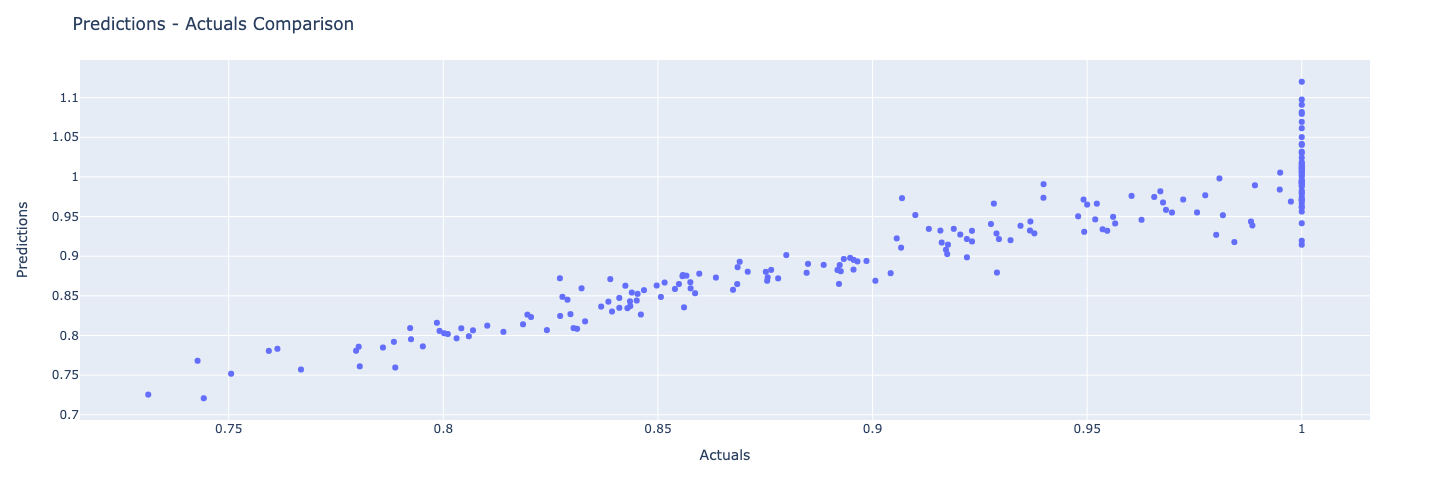

In [280]:
fig = px.scatter(res, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()

In [281]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))
ann.add(tf.keras.layers.Dense(units=64, activation='relu'))

ann.add(tf.keras.layers.Dense(units=1))
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')
ann.fit(X_train, y_train, batch_size = 32, epochs = 1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.8511
Epoch 2/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0213
Epoch 3/1000
25/25 [==============================] - 0s 972us/step - loss: 0.0158
Epoch 4/1000
25/25 [==============================] - 0s 996us/step - loss: 0.0132
Epoch 5/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 6/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 7/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0107
Epoch 8/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0098
Epoch 9/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 10/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 11/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 12/1000
25/25 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 13/1000
25/25 [

In [282]:
print("mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test)))
print("neg_mean_squared_error:", mean_squared_error(y_test, ann.predict(X_test), squared=False))
print("r2:", r2_score(y_test, ann.predict(X_test)))

mean_squared_error: 0.0009579482929118185
neg_mean_squared_error: 0.030950739779718003
r2: 0.8342310483917605


In [283]:
prediction = ann.predict(X_test)

res_ann = pd.DataFrame()
res_ann["Predictions"] = pd.Series(prediction.ravel())
res_ann["Actuals"] = y_test.values
res_ann["Diff"] = res_ann.Predictions - res_ann.Actuals
res_ann

,Predictions,Actuals,Diff
0,0.996810,1.000000,-0.003190
1,0.931863,0.928878,0.002985
2,0.881474,0.896479,-0.015005
3,0.892162,0.884644,0.007518
4,0.780758,0.795228,-0.014471
...,...,...,...
195,0.999974,1.000000,-0.000026
196,0.747769,0.731257,0.016513
197,0.875792,0.868561,0.007231
198,0.861515,0.856638,0.004877


In [284]:
res_ann.describe()

,Predictions,Actuals,Diff
count,200.000000,200.000000,200.000000
mean,0.907963,0.908533,-0.000570
std,0.072563,0.076209,0.031023
min,0.747547,0.731257,-0.100533
25%,0.849218,0.844768,-0.015327
50%,0.911428,0.915965,-0.000094
75%,0.979304,0.994896,0.014608
max,1.001622,1.000000,0.169410


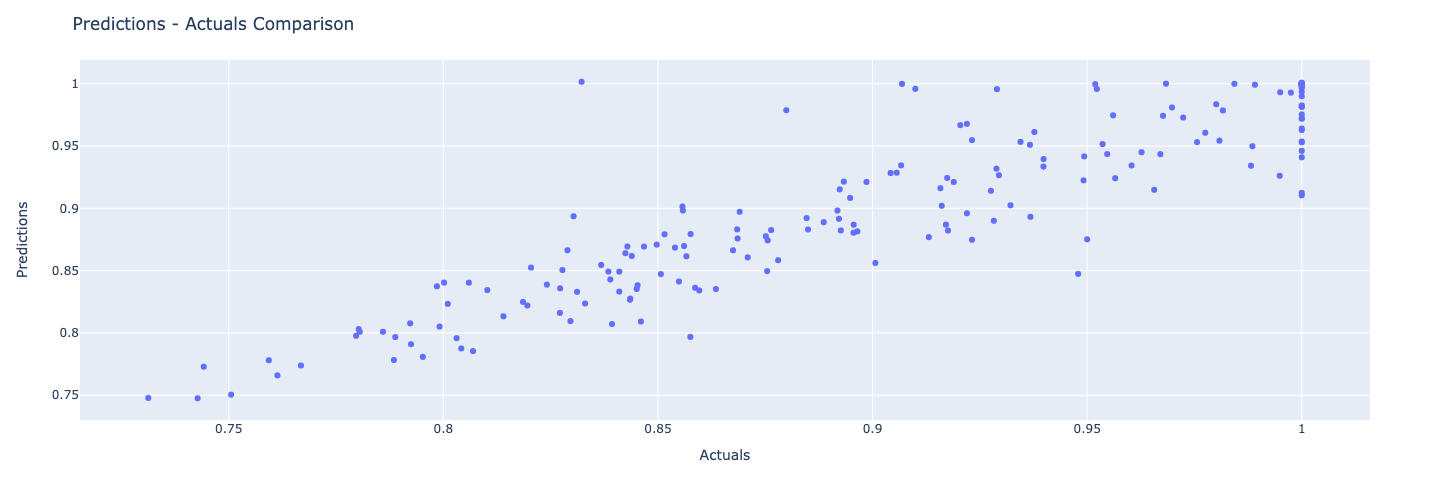

In [285]:
fig = px.scatter(res_ann, x="Actuals", y="Predictions")

fig.update_layout(
    autosize=False,
    width=800,
    height=500,
    title_text="Predictions - Actuals Comparison",
)

fig.show()